# Experiment 9

This experiment investigates the convergence rates of $E_{\mu_n}[R(\hat q)]$ compared to
constant $R(q^\star)$, using constant $p=6$, using $\lambda = O(1/n)$.

This time, we should expect convergence $O(1/n)$.

In [99]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import numpy as np
import cvxpy as cvx
from model.distrs import StudentTDistribution,DiscreteDistribution,NormalDistribution
from model.distrs import E,Var,Std
import model.synth_data as synth
import model.utility as ut
import model.problem as pr

from helper.stats import five_stats

In [4]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (10,4)
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['savefig.dpi'] = 100
plt.rc('text',usetex=True)
plt.rc('font',serif='times')

In [5]:
p = 6
ns = np.arange(50,2050,50)
n_true = 50000
n_experiments = 500
λ = 150
δ = 0.2

#Utility
β = 1
r_threshold = 60
u = ut.LinearPlateauUtility(β,r_threshold)

Rf = 0 

In [25]:
print(ns)

[  50  100  150  200  250  300  350  400  450  500  550  600  650  700  750
  800  850  900  950 1000 1050 1100 1150 1200 1250 1300 1350 1400 1450 1500
 1550 1600 1650 1700 1750 1800 1850 1900 1950 2000]


In [26]:
# True market
R_true = NormalDistribution(8,10)
X_true = [1/np.sqrt(2)*StudentTDistribution(ν=4) for _ in range(p)]
M_true = synth.GaussianMarket(X_true,R_true)

# Discretized market
X,R = M_true.sample(n_true)
M = synth.MarketDiscreteDistribution(X,R)

In [27]:
# Real q∗ value computation
p_star = pr.Problem(X,R,λ=0,u=u)
p_star.solve()
q_star = p_star.q

In [28]:
R_star_q_star = p_star.insample_cost(q_star)
CE_star_q_star = p_star.insample_CE(q_star)

In [17]:
# Results placeholder
qs = np.zeros(shape=(len(ns),p+1,n_experiments))
CEs_ins = np.empty(shape=(len(ns),n_experiments))
CEs_oos = np.empty(shape=(len(ns),n_experiments))
Rs_ins = np.empty(shape=(len(ns),n_experiments))
Rs_oos = np.empty(shape=(len(ns),n_experiments))

In [30]:
# About 8minutes running time.
for i,n in enumerate(ns):
    print('Sampling %d problems of size %d × %d' % (n_experiments,n,p+1))
    prs = pr.ProblemsDistribution(M,n,λ/n,u,Rf)
    prs.sample(n_experiments)
    qs[i,:p+1,:] = prs.qs.T
    CEs_ins[i,:] = prs.CEs_ins
    CEs_oos[i,:] = prs.CEs_oos
    Rs_ins[i,:] = prs.Rs_ins
    Rs_oos[i,:] = prs.Rs_oos

Sampling 500 problems of size 50 × 7


Sampling 500 problems of size 100 × 7


Sampling 500 problems of size 150 × 7


Sampling 500 problems of size 200 × 7


Sampling 500 problems of size 250 × 7


Sampling 500 problems of size 300 × 7


Sampling 500 problems of size 350 × 7


Sampling 500 problems of size 400 × 7


Sampling 500 problems of size 450 × 7


Sampling 500 problems of size 500 × 7


Sampling 500 problems of size 550 × 7


Sampling 500 problems of size 600 × 7


Sampling 500 problems of size 650 × 7


Sampling 500 problems of size 700 × 7


Sampling 500 problems of size 750 × 7


Sampling 500 problems of size 800 × 7


Sampling 500 problems of size 850 × 7


Sampling 500 problems of size 900 × 7


Sampling 500 problems of size 950 × 7


Sampling 500 problems of size 1000 × 7


Sampling 500 problems of size 1050 × 7


Sampling 500 problems of size 1100 × 7


Sampling 500 problems of size 1150 × 7


Sampling 500 problems of size 1200 × 7


Sampling 500 problems of size 1250 × 7


Sampling 500 problems of size 1300 × 7


Sampling 500 problems of size 1350 × 7


Sampling 500 problems of size 1400 × 7


Sampling 500 problems of size 1450 × 7


Sampling 500 problems of size 1500 × 7


Sampling 500 problems of size 1550 × 7


Sampling 500 problems of size 1600 × 7


Sampling 500 problems of size 1650 × 7


Sampling 500 problems of size 1700 × 7


Sampling 500 problems of size 1750 × 7


Sampling 500 problems of size 1800 × 7


Sampling 500 problems of size 1850 × 7


Sampling 500 problems of size 1900 × 7


Sampling 500 problems of size 1950 × 7


Sampling 500 problems of size 2000 × 7


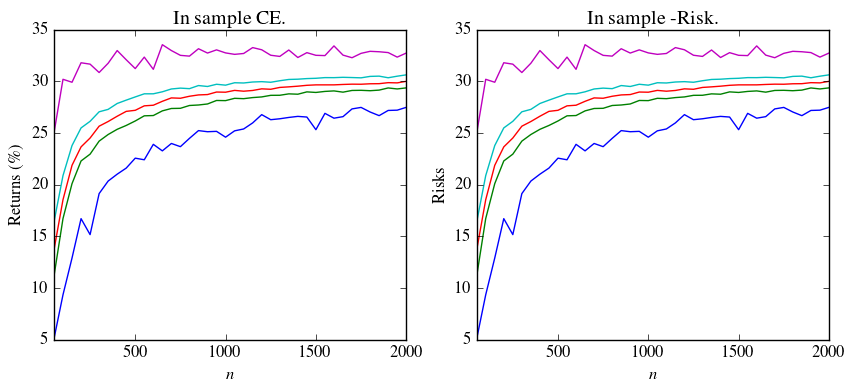

In [34]:
matplotlib.rcParams['figure.figsize'] = (10,4)
f,(p1,p2) = plt.subplots(1,2)
p1.plot(*five_stats(CEs_ins,ns))
p1.axis(xmin=50)
p1.set_xlabel('$n$')
p1.set_ylabel('Returns (\%)')
p1.set_title('In sample CE.');

p2.plot(*five_stats(-Rs_ins,ns))
p2.axis(xmin=50)
p2.set_xlabel('$n$')
p2.set_ylabel('Risks')
p2.set_title('In sample -Risk.');

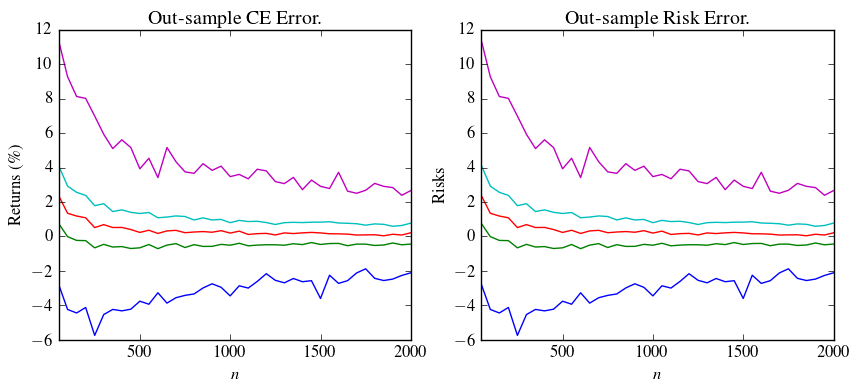

In [35]:
f,(p1,p2) = plt.subplots(1,2)
p1.plot(*five_stats(CEs_ins-CEs_oos,ns))
p1.axis(xmin=50)
p1.set_xlabel('$n$')
p1.set_ylabel('Returns (\%)')
p1.set_title('Out-sample CE Error.');

p2.plot(*five_stats(-Rs_ins+Rs_oos,ns))
p2.axis(xmin=50)
p2.set_xlabel('$n$')
p2.set_ylabel('Risks')
p2.set_title('Out-sample Risk Error.');

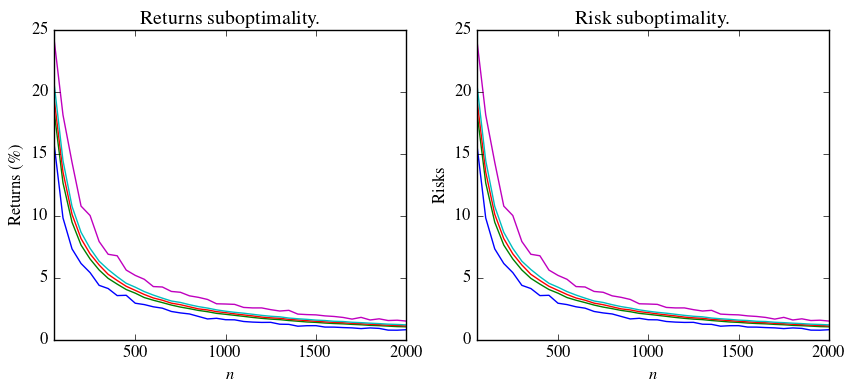

In [42]:
matplotlib.rcParams['figure.figsize'] = (10,4)
f,(p1,p2) = plt.subplots(1,2)
p1.plot(*five_stats(-CEs_oos+CE_star_q_star,ns))
p1.set_xlabel('$n$')
p1.set_ylabel('Returns (\%)')
p1.axis(xmin=50)
p1.set_title('Returns suboptimality.');

p2.plot(*five_stats(-R_star_q_star+Rs_oos,ns))
p2.set_xlabel('$n$')
p2.set_ylabel('Risks')
p2.axis(xmin=50)
p2.set_title('Risk suboptimality.');

(50, 2000.0, 0.0, 7.0)

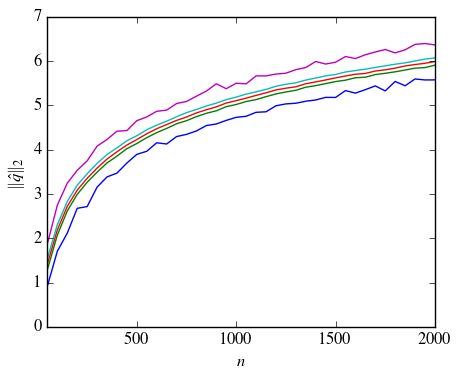

In [40]:
matplotlib.rcParams['figure.figsize'] = (5,4)
norm = np.linalg.norm
plt.plot(*five_stats(norm(qs,axis=1),ns))
plt.xlabel('$n$')
plt.ylabel('$\|\hat q\|_2$')
plt.axis(xmin=50)

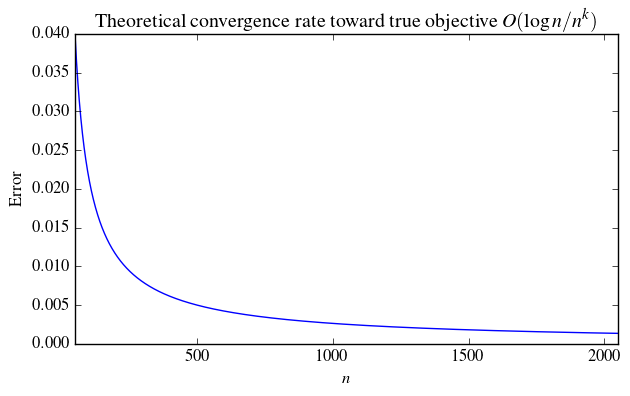

In [20]:
matplotlib.rcParams['figure.figsize'] = (7,4)
ns = np.arange(50,2050)
y = np.sqrt(np.log(ns))/ns
plt.plot(ns,y)
plt.axis(xmin=min(ns),xmax=max(ns))
plt.xlabel('$n$')
plt.ylabel('Error')
plt.title('Theoretical convergence rate toward true objective $O(\log n/n^k)$');

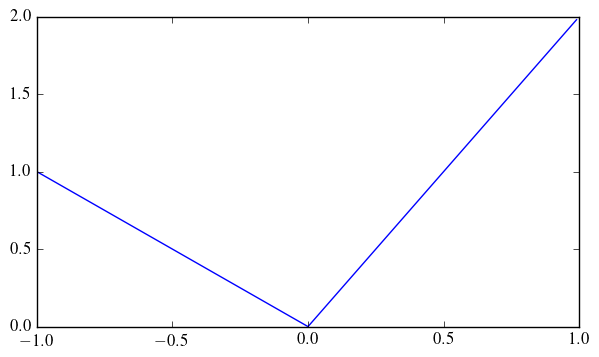

In [23]:
b = 1; h = 2
x = np.arange(-1,1,.01)
y = b*np.maximum(-x,0) + h*np.maximum(x,0)
plt.plot(x,y);

In [35]:
s = NormalDistribution().sample(500)
print(np.var(s))
print(np.sqrt(np.sum(s**2)))

0.989548346443
22.2443302595


In [37]:
print((52.54-52.09)/52.09)
print(np.log(52.54/52.09))

0.00863889422153956
0.00860179250029


In [41]:
x = np.arange(-1,1,0.1)
x * x

array([  1.00000000e+00,   8.10000000e-01,   6.40000000e-01,
         4.90000000e-01,   3.60000000e-01,   2.50000000e-01,
         1.60000000e-01,   9.00000000e-02,   4.00000000e-02,
         1.00000000e-02,   4.93038066e-32,   1.00000000e-02,
         4.00000000e-02,   9.00000000e-02,   1.60000000e-01,
         2.50000000e-01,   3.60000000e-01,   4.90000000e-01,
         6.40000000e-01,   8.10000000e-01])

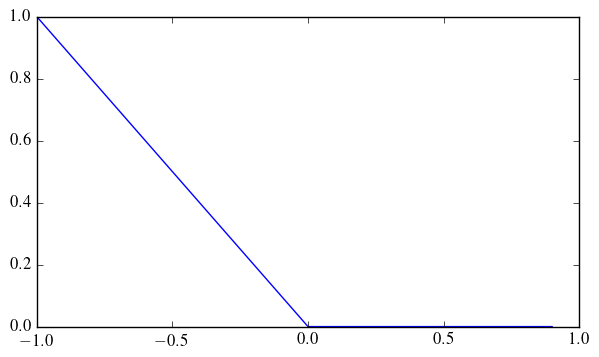

In [55]:
x = np.arange(-1,1,0.1)
def ρ(τ,u):
    return (τ - (u<=0))*u
plt.plot(x,ρ(0,x))

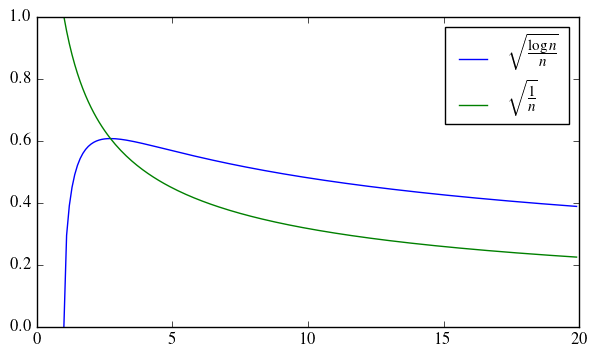

In [65]:
n = np.arange(1,20,0.1)
y1 = np.sqrt(np.log(n)/n)
y2 = np.sqrt(1/n)
plt.plot(n,y1,n,y2)
plt.legend(['$\\sqrt{\\frac{\\log n}{n}}$','$\\sqrt{\\frac{1}{n}}$']);

In [82]:
X = DiscreteDistribution([-1,1])
def ℓ(x): return np.maximum(-x,0)
np.mean(ℓ(0.01*X.sample(10000)))

0.0049230000000000003

In [102]:
import model.distrs as ds

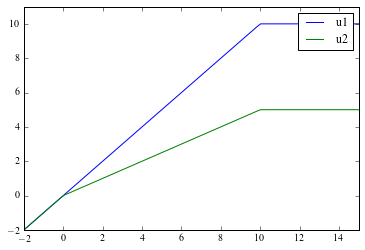

In [114]:
u1 = ut.LinearPlateauUtility(1,10)
u2 = ut.LinearPlateauUtility(.5,10)
x = np.linspace(-2,15,100)
plt.plot(x,u1(x),x,u2(x))
plt.axis(ymax=11,xmax=15);
plt.legend(['u1','u2'])

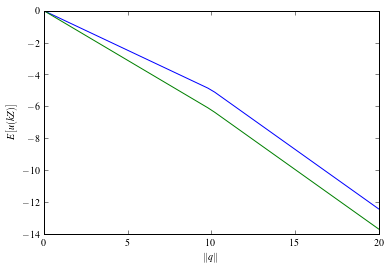

In [143]:
X = ds.DiscreteDistribution([-1,-1,-1,1])
s = X.sample(50000)
qs = np.linspace(0,20,50)
y1 = np.empty_like(qs)
y2 = np.empty_like(qs)
for i,q in enumerate(qs):
    y1[i] = np.mean(u1(q*s))
    y2[i] = np.mean(u2(q*s))

plt.plot(ks,y1,ks,y2);
plt.xlabel('$\\|q\\|$');
plt.ylabel('$E[u(kZ)]$');

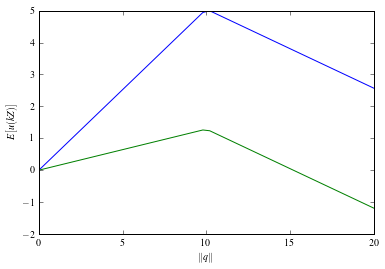

In [179]:
X = ds.DiscreteDistribution([-1,1,1,1])
s = X.sample(50000)
qs = np.linspace(0,20,50)
y1 = np.empty_like(qs)
y2 = np.empty_like(qs)
for i,q in enumerate(qs):
    y1[i] = np.mean(u1(q*s))
    y2[i] = np.mean(u2(q*s))

plt.plot(qs,y1,qs,y2);
plt.xlabel('$\\|q\\|$');
plt.ylabel('$E[u(kZ)]$');

In [193]:
X = ds.DiscreteDistribution([-1,1,1,1])
Y = ds.DiscreteDistribution([-1,1,1,1])
u1(X)
X = X.sample(50000)
Y = Y.sample(50000)
q1 = np.linspace(0,20,50)
q2 = np.linspace(0,20,50)
q1,q2 = np.meshgrid(q1,q2)
y = np.empty_like(q1)
y = np.mean(u1(q1*X + q2*Y))
print(q2.shape)

# y1 = np.empty_like(qs)
# y2 = np.empty_like(qs)
# for i,q in enumerate(qs):
#     y1[i] = np.mean(u1(q*s))
#     y2[i] = np.mean(u2(q*s))

# plt.plot(qs,y1,qs,y2);
# plt.xlabel('$\\|q\\|$');
# plt.ylabel('$E[u(kZ)]$');

TypeError: unorderable types: DiscreteDistribution() <= DiscreteDistribution()

In [165]:
Z = ds.DiscreteDistribution([-1,0.5,1])
B = ds.DiscreteDistribution([-1,1,1])
z = Z.sample(10000)
b = B.sample(10000)
print([E(Z),E(B)])
print([Var(Z),Var(B)])

[0.16666666666666666, 0.33333333333333331]
[0.72222222222222232, 0.88888888888888895]


In [192]:
u1(X)

TypeError: unorderable types: DiscreteDistribution() <= DiscreteDistribution()